In [202]:
# Import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [203]:
df = pd.read_csv("insurance.csv")

In [204]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [205]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [207]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [208]:
male = pd.get_dummies(df['sex'],drop_first=True, dtype = "int")
df = pd.concat([df, male] , axis = 1 )

In [209]:
Smoker = pd.get_dummies(df['smoker'], drop_first=True, dtype='int')
df = pd.concat([df,Smoker], axis = 1  )

In [210]:
df.rename({"yes": "Smoker"},axis =1, inplace=True)

In [211]:
df

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


# Analysis

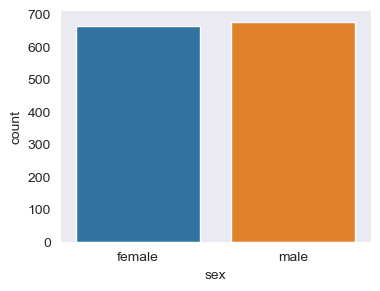

In [212]:
plt.figure(figsize=(4,3))
sns.countplot(x = 'sex', data= df)
sns.despine(left = True)

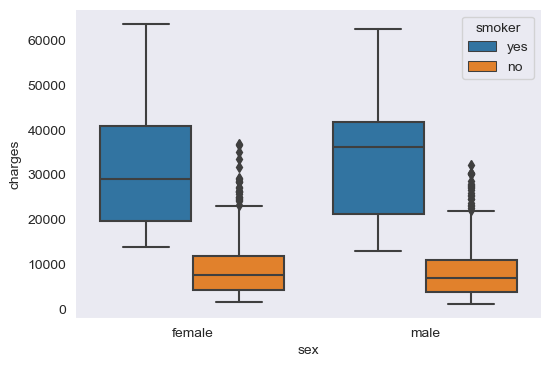

In [213]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y = "charges", data= df, hue= "smoker")
sns.despine(left=True)

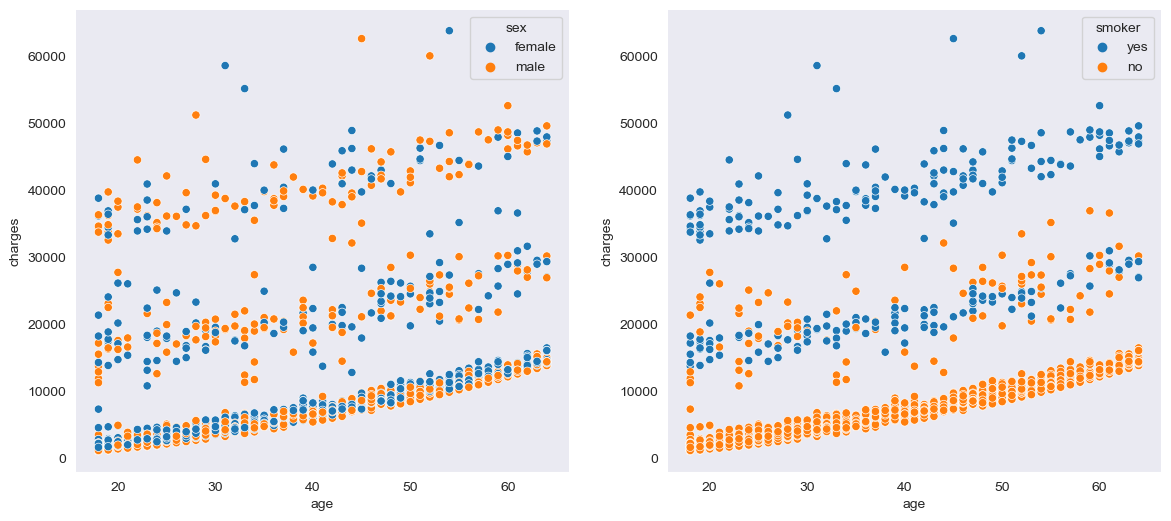

In [214]:
fig, ax = plt.subplots(nrows=1 , ncols = 2, figsize = (14,6))
sns.scatterplot(x="age", y = "charges",data= df ,hue= "sex",ax= ax[0])
sns.scatterplot(x="age", y = "charges",data= df ,hue= "smoker",ax= ax[1])
sns.despine(left=True)

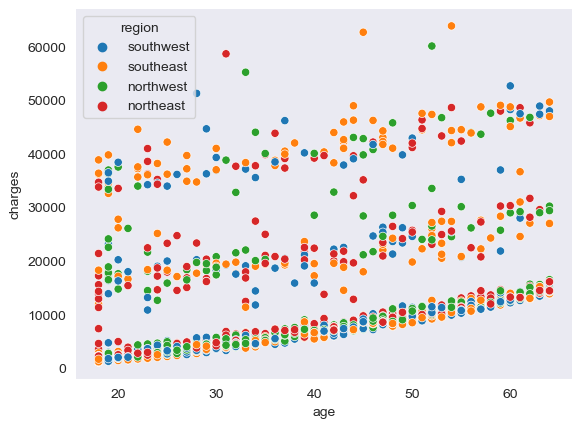

In [215]:
sns.scatterplot(x="age", y = "charges",data= df ,hue= "region")
sns.despine(left=True)

<Axes: xlabel='bmi', ylabel='charges'>

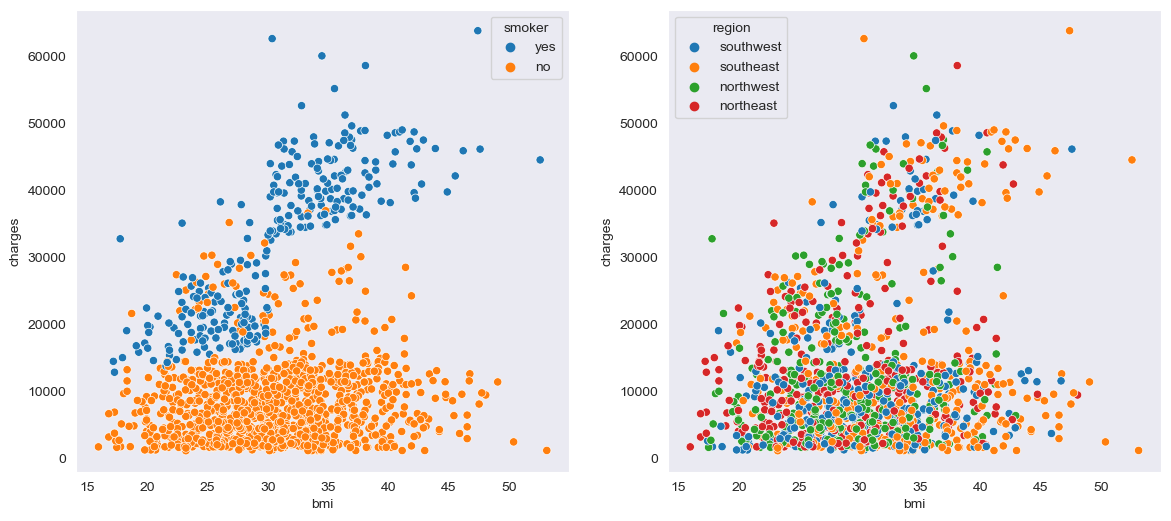

In [216]:
fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(14,6))
sns.scatterplot(x= "bmi" ,y= "charges" , data= df, hue = "smoker", ax = ax[0])
sns.scatterplot(x= "bmi" ,y= "charges" , data= df, hue = "region", ax = ax[1])

In [217]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [218]:
#drop the categorial values
df.drop(["sex", "smoker", "region"], axis = 1, inplace= True)

# Train Test Split

In [219]:
x = df.drop('charges', axis= 1) 
y = df['charges']

In [220]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [221]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(802, 5)
(536, 5)
(802,)
(536,)


In [222]:
#Scaling the data
scaler = StandardScaler()

In [223]:
scaled_xtrain = scaler.fit_transform(x_train)
scaled_xtest = scaler.transform(x_test)

# Support Vector Machine

In [224]:
from sklearn.svm import SVR
regressor = SVR(kernel ="rbf")
regressor.fit(scaled_xtrain,y_train)
y_pred = regressor.predict(scaled_xtest)

In [225]:
 np.mean((y_pred - y_test)**2)

156819961.3683189

Text(0.5, 0, 'Predicted Values')

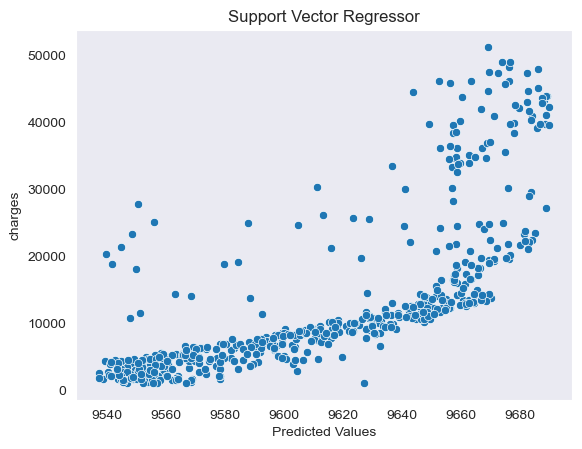

In [227]:
sns.set_style('dark')
f = sns.scatterplot(x = y_pred,y = y_test)
f.set_title("Support Vector Regressor")
f.set_xlabel("Predicted Values")           